In [10]:
import os
import pandas as pd
from newsapi import NewsApiClient
%matplotlib inline

In [6]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

In [7]:
%env NEWS_API=84a3e180ca29478b8875cd21eecf497a

env: NEWS_API=84a3e180ca29478b8875cd21eecf497a


# News Headlines Sentiment

Use the news api to pull the latest news articles for bitcoin and ethereum and create a DataFrame of sentiment scores for each coin. 

Use descriptive statistics to answer the following questions:
1. Which coin had the highest mean positive score?
2. Which coin had the highest negative score?
3. Which coin had the highest positive score?

In [207]:
# Read your api key environment variable
api_key = os.getenv("NEWS_API")

In [208]:
# Create a newsapi client
newsapi = NewsApiClient(api_key=api_key)

In [209]:
# Fetch the Bitcoin news articles
btc_articles = newsapi.get_everything(q='bitcoin',
                                      language='en',
                                      sort_by='relevancy')

['J.K. Rowling is four cocktails in and talking trash about Bitcoin',
 "Teenager Accused of Leading Ring of 'Evil Geniuses' on $24 Million 'Cybercrime Spree'",
 'A massive Bitcoin event is coming next week. Here’s what you need to know.',
 'FalconX raises $17M to power its crypto trading service',
 'How to Buy a Burner Phone',
 'It Happened: Bitcoin Just Experienced Third Halving In Its History',
 'The crypto market grows by $13 billion as bitcoin breaks the $10,000 threshold for the first time since February (BTC)',
 'The halving is here: Will it boost bitcoin prices? - CNBC Television',
 "Goldman Sachs lists 5 reasons why bitcoin is 'not an asset class', nor 'a suitable investment' (BTCUSD)",
 "'Get on the train': Famed investor Michael Novogratz says bitcoin will soon break the $10,000 threshold as US turmoil spreads (BTCUSD)",
 'Satoshi Nakaboto: ‘Bitcoin continues downtrend with 5% loss in one day’',
 'JPMorgan Extends Banking Services To Bitcoin Exchanges',
 'Satoshi Nakaboto: ‘V

In [210]:
# Fetch the Ethereum news articles
eth_articles = newsapi.get_everything(q='ethereum',
                                      language='en',
                                      sort_by='relevancy')
eth_articles['totalResults']

894

In [291]:
def get_sentiment_score(article, based_on):
    sentiments = []

    for article in article["articles"]:
        try:
            text = article[based_on]
            date = article["publishedAt"][:10]
            sentiment = analyzer.polarity_scores(text)
            compound = sentiment["compound"]
            pos = sentiment["pos"]
            neu = sentiment["neu"]
            neg = sentiment["neg"]
            sentiments.append({
                "Compound": compound,
                "Negative": neg,
                "Neutral": neu,
                "Positive": pos,
                based_on : text
            })

        except AttributeError:
            pass

    # Create DataFrame
    df = pd.DataFrame(sentiments)
    return df

In [292]:
# Create the Bitcoin sentiment scores DataFrame
btc_sentiment_df = get_sentiment_score(btc_articles, 'content')
btc_sentiment_df

,Compound,Negative,Neutral,Positive,content
0,0.7650,0.000,0.829,0.171,J.K. Rowling has been drinking a lot and you'd...
1,0.3182,0.000,0.933,0.067,"Yesterday, the prominent bitcoin investor Mich..."
2,0.2716,0.000,0.939,0.061,"Early next week, Bitcoin is about to experienc..."
3,0.0000,0.000,1.000,0.000,Over the last few weeks all eyes in the crypto...
4,-0.3464,0.134,0.819,0.046,If youre planning to do some protesting and yo...
5,-0.5859,0.134,0.866,0.000,Since the first Bitcoin block was generated ba...
6,0.0772,0.058,0.877,0.066,<ul><li>The cryptocurrency market added $13 bi...
7,-0.2755,0.070,0.930,0.000,Reuters\r\n<ul><li>Goldman Sachs gave five rea...
8,0.0000,0.000,1.000,0.000,<ul><li>Famed investor Michael Novogratz tweet...
9,0.5070,0.000,0.910,0.090,Our robot colleague Satoshi Nakaboto writes ab...


In [293]:
# Create the ethereum sentiment scores DataFrame
eth_sentiment_df = get_sentiment_score(eth_articles, 'content')
eth_sentiment_df

,Compound,Negative,Neutral,Positive,content
0,0.0000,0.000,1.000,0.000,Editors note:Andreessen Horowitzs Crypto Start...
1,0.0000,0.000,1.000,0.000,For developers looking to quickly build identi...
2,0.6249,0.000,0.859,0.141,Use this to send Ether from one account to ano...
3,-0.4457,0.086,0.882,0.031,"Some open-source groups, such as The Linux Fou..."
4,0.0000,0.148,0.703,0.148,With unemployment surging and businesses strug...
5,0.0000,0.000,1.000,0.000,Over the last few weeks all eyes in the crypto...
6,0.5719,0.000,0.885,0.115,We have been looking for ways in which crypto ...
7,0.2732,0.000,0.943,0.057,"Back in March, we put out our call for ideas t..."
8,0.0772,0.058,0.877,0.066,<ul><li>The cryptocurrency market added $13 bi...
9,0.5070,0.000,0.910,0.090,Our robot colleague Satoshi Nakaboto writes ab...


In [294]:
# Describe the Bitcoin Sentiment
btc_sentiment_df.describe()

,Compound,Negative,Neutral,Positive
count,19.000000,19.000000,19.000000,19.000000
mean,0.253084,0.024947,0.903368,0.071632
std,0.398747,0.046209,0.050314,0.051823
min,-0.585900,0.000000,0.812000,0.000000
25%,0.000000,0.000000,0.878000,0.044000
50%,0.507000,0.000000,0.910000,0.090000
75%,0.507000,0.029000,0.920000,0.090000
max,0.801600,0.134000,1.000000,0.188000


In [295]:
# Describe the Ethereum Sentiment
eth_sentiment_df.describe()

,Compound,Negative,Neutral,Positive
count,16.000000,16.000000,16.000000,16.000000
mean,0.208544,0.025188,0.891562,0.083125
std,0.379712,0.044487,0.109049,0.095304
min,-0.445700,0.000000,0.665000,0.000000
25%,0.000000,0.000000,0.872500,0.000000
50%,0.038600,0.000000,0.897500,0.061500
75%,0.523225,0.039250,1.000000,0.121500
max,0.919800,0.148000,1.000000,0.335000


### Questions:

Q: Which coin had the highest mean positive score?

A: **Bitcoin - 0.253084**

Q: Which coin had the highest compound score?

A: **Ethereum - 0.919800**

Q. Which coin had the highest positive score?

A: **Ethereum - 0.335000**

---

# Tokenizer

In this section, you will use NLTK and Python to tokenize the text for each coin. Be sure to:
1. Lowercase each word
2. Remove Punctuation
3. Remove Stopwords

In [296]:
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from string import punctuation
import re

In [297]:
# Expand the default stopwords list if necessary
lemmatizer = WordNetLemmatizer()

stop_words = set(stopwords.words('english'))

In [218]:
# Complete the tokenizer function
def tokenizer(text):
    """Tokenizes text."""
    # Remove the punctuation
    regex = re.compile("[^a-zA-Z0-9 ]")
    re_clean = regex.sub('', text)
    
    # Create a list of the words
    words = word_tokenize(re_clean.lower())
    
    # Convert the words to lowercase and Remove the stop words
    words = [word for word in words if word not in stop_words]
    
    # Lemmatize Words into root words
    root_words = [lemmatizer.lemmatize(word) for word in words]
    
    return root_words

In [302]:
# Create a new tokens column for bitcoin
btc_sentiment_df['tokens'] = btc_sentiment_df['content'].apply(tokenizer)
btc_sentiment_df.head()

,Compound,Negative,Neutral,Positive,content,tokens
0,0.7650,0.000,0.829,0.171,J.K. Rowling has been drinking a lot and you'd...,"[jk, rowling, drinking, lot, youd, better, bel..."
1,0.3182,0.000,0.933,0.067,"Yesterday, the prominent bitcoin investor Mich...","[yesterday, prominent, bitcoin, investor, mich..."
2,0.2716,0.000,0.939,0.061,"Early next week, Bitcoin is about to experienc...","[early, next, week, bitcoin, experience, third..."
3,0.0000,0.000,1.000,0.000,Over the last few weeks all eyes in the crypto...,"[last, week, eye, crypto, world, glued, halven..."
4,-0.3464,0.134,0.819,0.046,If youre planning to do some protesting and yo...,"[youre, planning, protesting, dont, want, risk..."


In [303]:
# Create a new tokens column for ethereum
eth_sentiment_df['tokens'] = eth_sentiment_df['content'].apply(tokenizer)
eth_sentiment_df.head()

,Compound,Negative,Neutral,Positive,content,tokens
0,0.0000,0.000,1.000,0.000,Editors note:Andreessen Horowitzs Crypto Start...,"[editor, noteandreessen, horowitz, crypto, sta..."
1,0.0000,0.000,1.000,0.000,For developers looking to quickly build identi...,"[developer, looking, quickly, build, identity,..."
2,0.6249,0.000,0.859,0.141,Use this to send Ether from one account to ano...,"[use, send, ether, one, account, another, smar..."
3,-0.4457,0.086,0.882,0.031,"Some open-source groups, such as The Linux Fou...","[opensource, group, linux, foundation, deal, o..."
4,0.0000,0.148,0.703,0.148,With unemployment surging and businesses strug...,"[unemployment, surging, business, struggling, ..."


---

# NGrams and Frequency Analysis

In this section you will look at the ngrams and word frequency for each coin. 

1. Use NLTK to produce the n-grams for N = 2. 
2. List the top 10 words for each coin. 

In [304]:
from collections import Counter
from nltk import ngrams

In [305]:
def get_tokens(df):
    tokens = []
    for token in df['tokens']:
        tokens.extend(token)
    return tokens


btc_tokens = get_tokens(btc_sentiment_df)
eth_tokens = get_tokens(eth_sentiment_df)

In [306]:
def bigram_counter(tokens, N=2): 
    words_count = dict(Counter(ngrams(tokens, n=N)))
    return words_count

In [307]:
# Generate the Bitcoin N-grams where N=2
bigram_btc = bigram_counter(btc_tokens, 2)

In [308]:
# Generate the Ethereum N-grams where N=2
bigram_eth = bigram_counter(eth_tokens, 2)

In [309]:
# Use the token_count function to generate the top 10 words from each coin
def token_count(tokens, N=10):
    """Returns the top N tokens from the frequency count"""
    return Counter(tokens).most_common(N)

In [310]:
# Get the top 10 words for Bitcoin
top_10_token_btc = token_count(btc_tokens)
top_10_token_btc

[('bitcoin', 34),
 ('char', 19),
 ('satoshi', 16),
 ('nakaboto', 16),
 ('every', 11),
 ('another', 9),
 ('robot', 8),
 ('colleague', 8),
 ('writes', 8),
 ('fucking', 8)]

In [360]:
# Get the top 10 words for Ethereum
top_10_token_eth = token_count(eth_tokens)
top_10_token_eth

[('char', 16),
 ('bitcoin', 6),
 ('crypto', 5),
 ('blockchain', 3),
 ('build', 2),
 ('looking', 2),
 ('platform', 2),
 ('dont', 2),
 ('internet', 2),
 ('account', 2)]

# Word Clouds

In this section, you will generate word clouds for each coin to summarize the news for each coin

In [239]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [20.0, 10.0]

Text(0.5, 1.0, 'Bitcoin Word Cloud')

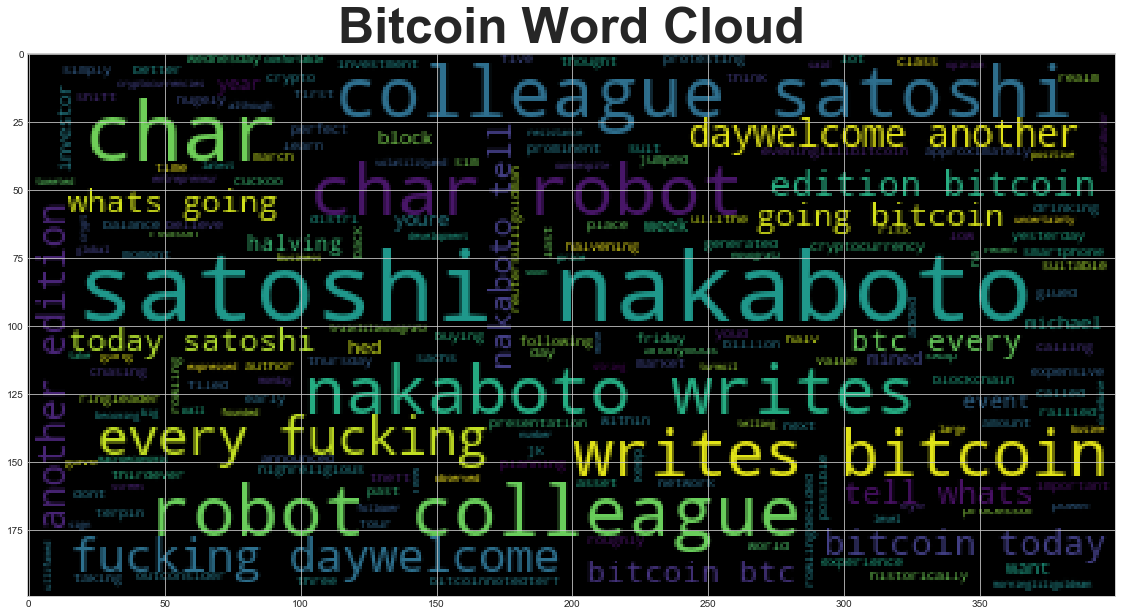

In [312]:
# Generate the Bitcoin word cloud
wc = WordCloud().generate(' '.join(btc_tokens))
plt.imshow(wc)
plt.title(label='Bitcoin Word Cloud', fontdict={'fontsize': 50, 'fontweight':'bold'})

Text(0.5, 1.0, 'Ethereum Word Cloud')

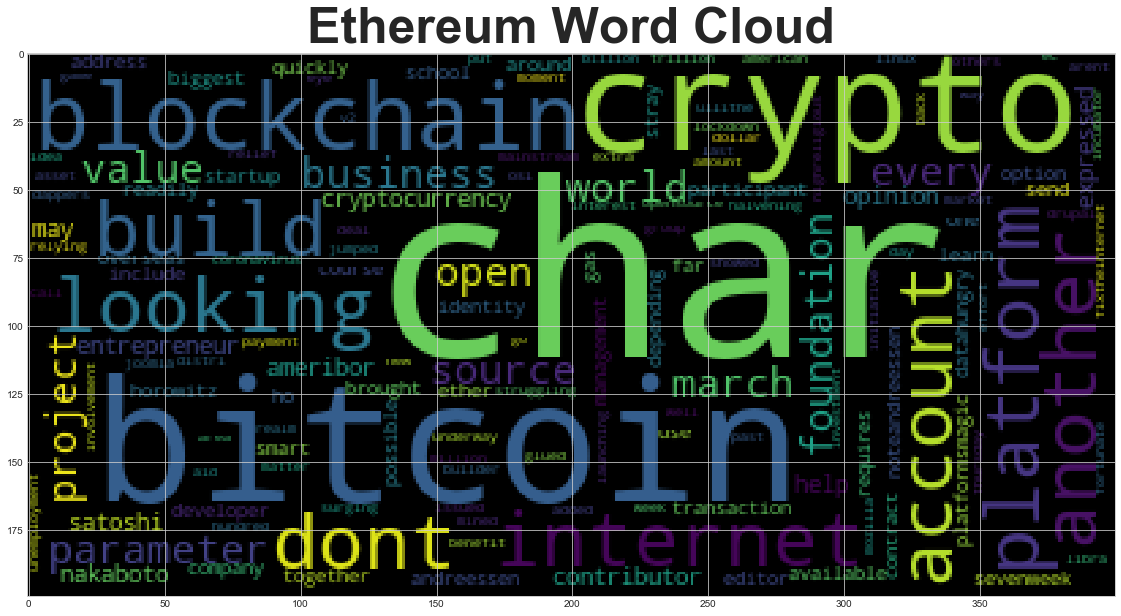

In [313]:
# Generate the Ethereum word cloud
wc = WordCloud().generate(' '.join(eth_tokens))
plt.imshow(wc)
plt.title(label='Ethereum Word Cloud', fontdict={'fontsize': 50, 'fontweight':'bold'})

# Named Entity Recognition

In this section, you will build a named entity recognition model for both coins and visualize the tags using SpaCy.

In [314]:
import spacy
from spacy import displacy

In [315]:
# Optional - download a language model for SpaCy
# !python -m spacy download en_core_web_sm

In [316]:
# Load the spaCy model
nlp = spacy.load('en_core_web_sm')

## Bitcoin NER

In [319]:
# Concatenate all of the bitcoin text together
btc_content = ' '.join(btc_sentiment_df['content'])

In [334]:
nlp(btc_content)

J.K. Rowling has been drinking a lot and you'd better believe she has some thoughts on Bitcoin.
NotedTERF and author of The Cuckoos Calling, Rowlingdecided Friday was the perfect time to learn about… [+2124 chars] Yesterday, the prominent bitcoin investor Michael Terpin announced that hed filed suit against the ringleader of a SIM swap gang that hed been chasing down since 2018, following the theft of roughly … [+2243 chars] Early next week, Bitcoin is about to experience its third-ever halving, a hugely important event that could shift the balance of power within the network. Historically the event, also called the halv… [+7424 chars] Over the last few weeks all eyes in the crypto world have been glued to the halvening, a nigh-religious moment in the blockchain realm. Every once in a while, the amount of new bitcoin mined — distri… [+4849 chars] If youre planning to do some protesting and you dont want to risk your expensive smartphone in the processor you simply want to keep yourself

In [353]:
# Run the NER processor on all of the text
doc= nlp(btc_content)

# Add a title to the document
doc.user_data["title"] = "Bitcoin NER"

In [354]:
# Render the visualization
displacy.render(doc, style='ent')

In [341]:
for ent in doc.ents:
    print('{} {}'.format(ent.text, ent.label_))

J.K. Rowling PERSON
Bitcoin GPE
The Cuckoos Calling WORK_OF_ART
Friday DATE
Yesterday DATE
Michael Terpin PERSON
SIM ORG
2018 DATE
Early next week DATE
Bitcoin GPE
third ORDINAL
the last few weeks DATE
blockchain GPE
new bitcoin LOC
first ORDINAL
Bitcoin GPE
2009 DATE
three CARDINAL
210,000 CARDINAL
every four years DATE
Bitcoin GPE
$13 billion MONEY
the past day DATE
bitcoin GPE
more than 6% PERCENT
Thursday DATE
Bitcoin GPE
more than 100% PERCENT
March 16 DATE
Reuters
 ORG
Goldman Sachs ORG
five CARDINAL
bitcoin GPE
Wednesday DATE
Goldman ORG
Michael Novogratz PERSON
Monday DATE
bitcoin GPE
$10,000 resistance MONEY
Novogratz PERSON
Satoshi Nakaboto PERSON
Bitcoin GPE
Bitcoin GPE
Today DATE
Satoshi Nakaboto PERSON
Bitcoin GPE
bitcoin GPE
2012 DATE
Satoshi Nakaboto PERSON
Bitcoin GPE
Bitcoin GPE
Today DATE
Satoshi Nakaboto PERSON
Bitcoin GPE
2020 DATE
a big year DATE
Bitcoin GPE
Satoshi Nakaboto PERSON
Bitcoin GPE
Bitcoin GPE
Today DATE
Satoshi Nakaboto PERSON
Bitcoin GPE
Satoshi Nakab

---

## Ethereum NER

In [356]:
# Concatenate all of the bitcoin text together
eth_content = ' '.join(eth_sentiment_df['content'])
eth_content

'Editors note:Andreessen Horowitzs Crypto Startup School brought together 45 participants from around the U.S. and overseas in a seven-week course to learn how to build crypto companies. Andreessen Ho… [+2503 chars] For developers looking to quickly build identity management into their platforms, the most readily available options don’t stray far from the internet’s biggest, most data-hungry platforms.\r\nMagic, a… [+2450 chars] Use this to send Ether from one account to another or a smart contract address. It requires a few parameters depending on the transaction. Possible parameters include from, to, value, gas, and more.\r… [+206 chars] Some open-source groups, such as The Linux Foundation, can deal with it. Others aren\'t so fortunate. Some, such as Drupal Foundation, the Open Source Initiative (OSI), Open Source Matters (Joomla), a… [+1202 chars] With unemployment surging and businesses struggling under lockdown, millions of Americans are relying on the extra benefits payments iss

In [357]:
# Run the NER processor on all of the text
doc= nlp(eth_content)

# Add a title to the document
doc.user_data["title"] = "Ethereum NER"

In [358]:
# Render the visualization
displacy.render(doc, style='ent')

In [359]:
# List all Entities
for ent in doc.ents:
    print('{} {}'.format(ent.text, ent.label_))

Andreessen ORG
Crypto Startup School ORG
45 CARDINAL
U.S. GPE
seven-week DATE
Andreessen Ho PERSON
Ether PERSON
The Linux Foundation ORG
Drupal Foundation ORG
OSI ORG
millions CARDINAL
Americans NORP
$2 trillion dollar MONEY
Relief ORG
Ec ORG
the last few weeks DATE
blockchain GPE
new bitcoin LOC
crypto NORP
Dapper ORG
Libra GPE
March DATE
1500 CARDINAL
well over a hundred CARDINAL
the Mozilla Builders Incubator ORG
$13 billion MONEY
the past day DATE
bitcoin GPE
more than 6% PERCENT
Thursday DATE
Bitcoin GPE
more than 100% PERCENT
March 16 DATE
Satoshi Nakaboto PERSON
Bitcoin GPE
Bitcoin GPE
Today DATE
Satoshi Nakaboto PERSON
Bitcoin GPE
Blockchain GPE
first ORDINAL
blockchain GPE
2020 DATE
a big year DATE
Bitcoin GPE
today DATE
27 CARDINAL
Java PERSON
Federal Reserve Board ORG
Jerome H. Powell PERSON
May 28, 2020 DATE
